## Titanic Challenge 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler

## To calculate model accuracy

In [5]:
def accuracyReport(clf,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
    clf.fit(X_train,y_train)
    print("Train Score --------------------------------**********")
    print("Accuracy score is ",accuracy_score(y_train,clf.predict(X_train)))
    print(classification_report(y_train,clf.predict(X_train)))
    print(confusion_matrix(y_train,clf.predict(X_train)))
    print("Test Score --------------------------------**********")
    print("Accuracy score is ",accuracy_score(y_test,clf.predict(X_test)))
    print(classification_report(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_test,clf.predict(X_test)))

## Data Pre processing

In [6]:
def preProcess(df):
    object1= StandardScaler()
    sex_to_num = {
    'male':0,
    'female':1
    }
    embarked_to_num = {
    'C':0,
    'Q':1,
    'S':2
    }
    df = df.drop(['Name','Ticket','Cabin'],axis=1)
    df['sex_to_num'] = df['Sex'].map(sex_to_num) 
    df = df.drop('Sex',axis=1)
    df['embarked_to_num'] = df['Embarked'].map(embarked_to_num) 
    df = df.drop('Embarked',axis=1)
    df['Age'] = df['Age'].fillna(29.6)
    df['Age_scaled'] = object1.fit_transform(df[['Age']]) 
    df['embarked_to_num'] = df['embarked_to_num'].fillna(df['embarked_to_num'].mode()[0])
    df_encoded = pd.get_dummies(df['embarked_to_num'], prefix='embarked')
    df = pd.concat([df, df_encoded], axis=1)
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Fare_Scaled'] = object1.fit_transform(df[['Fare']]) 
    return df

In [7]:
df = pd.read_csv('train.csv')
df = preProcess(df)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_to_num,embarked_to_num,Age_scaled,embarked_0.0,embarked_1.0,embarked_2.0,Fare_Scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.679428,0.523008,0.381594,32.204208,0.352413,1.536476,-2.472146e-16,0.188552,0.086420,0.725028,3.987333e-18
std,257.353842,0.486592,0.836071,13.002075,1.102743,0.806057,49.693429,0.477990,0.791503,1.000562e+00,0.391372,0.281141,0.446751,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.251630e+00,0.000000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,-5.909626e-01,0.000000,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,29.600000,0.000000,0.000000,14.454200,0.000000,2.000000,-6.112272e-03,0.000000,0.000000,1.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,4.094393e-01,0.000000,0.000000,1.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,3.872369e+00,1.000000,1.000000,1.000000,9.667167e+00


## Identifying feature co-relation

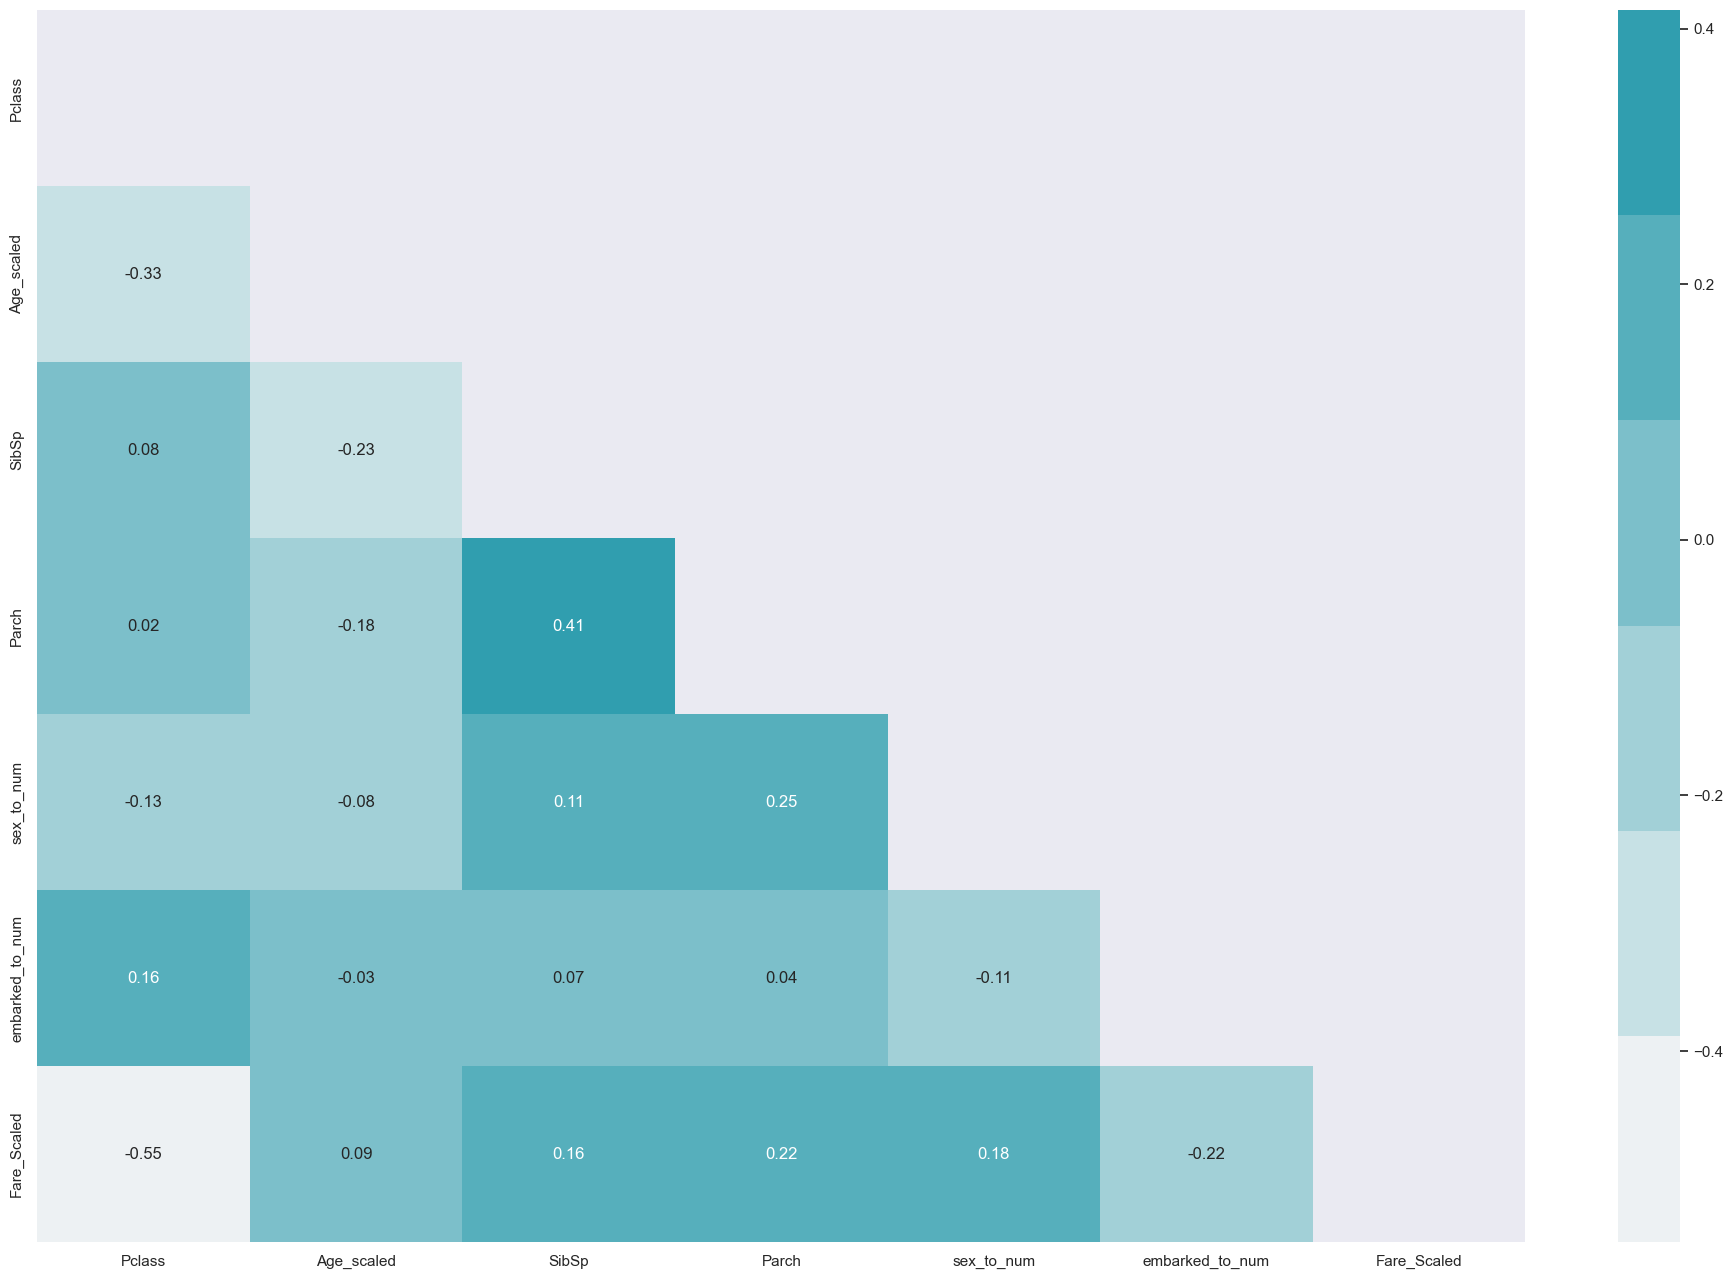

In [8]:
feature_cols = ['Pclass','Age_scaled','SibSp','Parch','sex_to_num','embarked_to_num','Fare_Scaled']
plt.figure(figsize=(24,16))
mask = np.zeros_like(df[feature_cols].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210,90,60), input ="husl")
sns.heatmap(df[feature_cols].corr(),
            annot=True,
            mask=mask,
            cmap = cmap,
            fmt=".2f");

## Model Training

In [9]:
X = df[feature_cols]
y = df['Survived']
y.unique()

array([0, 1])

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
clf = DecisionTreeClassifier(random_state = 42)
accuracyReport(clf,X,y)

Train Score --------------------------------**********
Accuracy score is  0.9850187265917603
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       333
           1       0.99      0.97      0.98       201

    accuracy                           0.99       534
   macro avg       0.99      0.98      0.98       534
weighted avg       0.99      0.99      0.98       534

[[332   1]
 [  7 194]]
Test Score --------------------------------**********
Accuracy score is  0.7675070028011205
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       216
           1       0.71      0.70      0.70       141

    accuracy                           0.77       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

[[175  41]
 [ 42  99]]


In [11]:
bag_clf = BaggingClassifier(estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
accuracyReport(bag_clf,X,y)

Train Score --------------------------------**********
Accuracy score is  0.9868913857677902
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       325
           1       1.00      0.97      0.98       209

    accuracy                           0.99       534
   macro avg       0.99      0.98      0.99       534
weighted avg       0.99      0.99      0.99       534

[[324   1]
 [  6 203]]
Test Score --------------------------------**********
Accuracy score is  0.803921568627451
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       224
           1       0.73      0.74      0.74       133

    accuracy                           0.80       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357

[[188  36]
 [ 34  99]]


In [12]:
final_df = pd.read_csv('test.csv')
final_df = preProcess(final_df)
final_df.describe()
X = final_df[feature_cols]

## Prediction

In [13]:
X.describe()
predict_vals = bag_clf.predict(X)

In [14]:
data = {
    "PassengerId": [],
    "Survived": []
}
for i in range(892, 1310):
    data["PassengerId"].append(i)
    data["Survived"].append(None)
df = pd.DataFrame(data)
df_1 = pd.DataFrame(predict_vals)
df['Survived'] = df_1

In [15]:
df.to_csv('result_data.csv', index=False)

# using tensor flow

In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [57]:
df = pd.read_csv('train.csv')
df = preProcess(df)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_to_num,embarked_to_num,Age_scaled,embarked_0.0,embarked_1.0,embarked_2.0,Fare_Scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.679428,0.523008,0.381594,32.204208,0.352413,1.536476,-2.472146e-16,0.188552,0.086420,0.725028,3.987333e-18
std,257.353842,0.486592,0.836071,13.002075,1.102743,0.806057,49.693429,0.477990,0.791503,1.000562e+00,0.391372,0.281141,0.446751,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.251630e+00,0.000000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,-5.909626e-01,0.000000,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,29.600000,0.000000,0.000000,14.454200,0.000000,2.000000,-6.112272e-03,0.000000,0.000000,1.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,4.094393e-01,0.000000,0.000000,1.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,3.872369e+00,1.000000,1.000000,1.000000,9.667167e+00


In [58]:
X = df[feature_cols]
y = df['Survived']

In [59]:
model = Sequential([
    Dense(units=12,activation='selu'),
    Dense(units=10,activation='relu'),
    Dense(units=1,activation='sigmoid')
])
model.compile(loss=BinaryCrossentropy())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
23/23 [==============================] - 0s 956us/step - loss: 0.7627
Epoch 2/250
23/23 [==============================] - 0s 1ms/step - loss: 0.6467
Epoch 3/250
23/23 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 4/250
23/23 [==============================] - 0s 1ms/step - loss: 0.5709
Epoch 5/250
23/23 [==============================] - 0s 962us/step - loss: 0.5545
Epoch 6/250
23/23 [==============================] - 0s 931us/step - loss: 0.5359
Epoch 7/250
23/23 [==============================] - 0s 936us/step - loss: 0.5184
Epoch 8/250
23/23 [==============================] - 0s 986us/step - loss: 0.5032
Epoch 9/250
23/23 [==============================] - 0s 1ms/step - loss: 0.4896
Epoch 10/250
23/23 [==============================] - 0s 975us/step - loss: 0.4779
Epoch 11/250
23/23 [==============================] - 0s 900us/step - loss: 0.4672
Epoch 12/250
23/23 [==============================] - 0s 956us/step - loss: 0.4583
Epoch 13/250
23/23 [=

In [60]:
y_pred_test = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [61]:
y_pred_test_binary = (y_pred_test > 0.5).astype(np.int32)

# Generate the accuracy report
target_names = ['Not Survived', 'Survived']
report = classification_report(y_test, y_pred_test_binary, target_names=target_names)

In [62]:
print(report)

              precision    recall  f1-score   support

Not Survived       0.81      0.90      0.85       109
    Survived       0.81      0.67      0.73        70

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [63]:
accuracy = accuracy_score(y_test, y_pred_test_binary) * 100
print(accuracy)

81.00558659217877


In [64]:
final_df = pd.read_csv('test.csv')
final_df = preProcess(final_df)
final_df.describe()
X = final_df[feature_cols]
y_predict = model.predict(X)


14/14 [==============================] - 0s 719us/step


In [69]:
y_predict_1 = (y_predict > 0.5).astype(np.int32)
print(len(y_predict_1))
data = {
    "PassengerId": [],
    "Survived": []
}
for i in range(892, 1310):
    data["PassengerId"].append(i)
    data["Survived"].append(None)
df = pd.DataFrame(data)
df_1 = pd.DataFrame(y_predict_1)
print(df_1.shape)
df['Survived'] = df_1
df.to_csv('result_data_3.csv', index=False)

418
(418, 1)


## Extra Trees Classifier

In [233]:
from sklearn.ensemble import ExtraTreesClassifier
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=80)
accuracyReport(xt_clf,X,y)

Train Score --------------------------------**********
Accuracy score is  0.9850187265917603
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       330
           1       0.99      0.97      0.98       204

    accuracy                           0.99       534
   macro avg       0.99      0.98      0.98       534
weighted avg       0.99      0.99      0.98       534

[[329   1]
 [  7 197]]
Test Score --------------------------------**********
Accuracy score is  0.7871148459383753
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       219
           1       0.74      0.69      0.71       138

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.79      0.79      0.79       357

[[186  33]
 [ 43  95]]


In [206]:
final_df = pd.read_csv('test.csv')
final_df = preProcess(final_df)
final_df.describe()
X = final_df[feature_cols]

In [207]:
predict_vals = xt_clf.predict(X)

In [208]:
data = {
    "PassengerId": [],
    "Survived": []
}
for i in range(892, 1310):
    data["PassengerId"].append(i)
    data["Survived"].append(None)
df = pd.DataFrame(data)
df_1 = pd.DataFrame(predict_vals)
df['Survived'] = df_1

In [209]:
df.to_csv('result_data_1.csv', index=False)